<a href="https://colab.research.google.com/github/pauarmentaa/Regresion-Lineal/blob/main/Actividad_6_2_ESP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("Datos_limpios_ESP.csv")
df.head()

<ipython-input-3-0983eb0271d3>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("Datos_limpios_ESP.csv")


,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,Mun,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
1,1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,https://www.airbnb.com/users/show/6586355,Montse,...,4.85,4.85,4.91,4.69,4.80,1.0,0.0,0.0,0.0,0.51
2,2,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,sin informacion,https://a0.muscache.com/pictures/18245529/0886...,https://www.airbnb.com/users/show/6620645,Myriam,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
3,3,https://www.airbnb.com/rooms/751638,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,https://www.airbnb.com/users/show/3680160,Roberto,...,4.50,4.86,5.00,4.63,4.50,6.0,1.0,0.0,0.0,0.08
4,4,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,https://www.airbnb.com/users/show/180072,Marisa,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09


In [4]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

72

In [5]:
#No se porque sale que hay nulos si en el archivo del pais dice que hay 0 nulos
#para que no haya errores todos los nulos los reemplazo con bfill
df.fillna(method='bfill', inplace=True)

In [6]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19656 entries, 0 to 19655
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    19656 non-null  object 
 1   listing_url                                   19656 non-null  object 
 2   last_scraped                                  19656 non-null  object 
 3   source                                        19656 non-null  object 
 4   name                                          19656 non-null  object 
 5   description                                   19656 non-null  object 
 6   neighborhood_overview                         19656 non-null  object 
 7   picture_url                                   19656 non-null  object 
 8   host_url                                      19656 non-null  object 
 9   host_name                                     19656 non-null 

## Analizar la correlación que existe en cada tipo de habitación (Elegir 2 tipos) respecto a las variables siguientes en el siguiente orden “(dependiente, independiente)”

# **Tipo de habitación 1: Private room.**

## **1.“host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating”**

In [8]:
# Filtrar los datos para obtener solo los tipos de habitación "Entire home/apt" y "Hotel room"
private_room = df[df['room_type'] == 'Private room']

In [ ]:
#Cambiar datos
private_room['host_response_rate'] = private_room['host_response_rate'].astype(str)  
private_room['host_response_rate'] = private_room['host_response_rate'].str.replace('%', '')  
private_room['host_response_rate'] = pd.to_numeric(private_room['host_response_rate'], errors='coerce')  
private_room[['host_acceptance_rate',"host_response_rate"]] = private_room[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

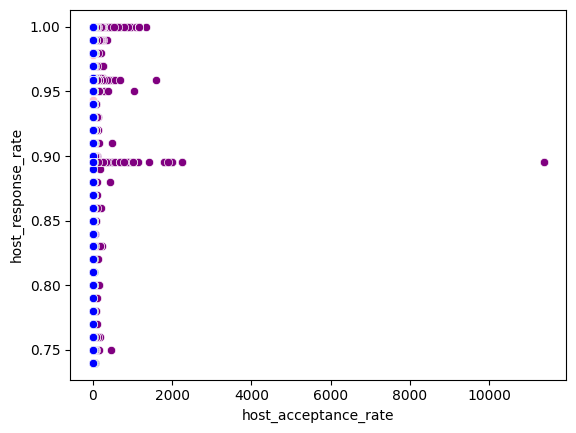

In [10]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate',color="pink",data=private_room)
sns.scatterplot(x='price', y='host_acceptance_rate', color="purple", data=private_room)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="green", data=private_room)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="blue", data=private_room)

In [11]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]]
Var_Dep= private_room['host_acceptance_rate']

In [12]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [13]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [14]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [15]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 1.73407329e-01, -5.72898633e-06, -2.32447628e-04,  1.03802055e-02]),
 'rank_': 4,
 'singular_': array([1.81586528e+04, 2.70273780e+02, 7.04187506e+00, 9.59537058e-01]),
 'intercept_': 0.7416582781291999}

**Modelo matemático: y= 1.73407329e-01x1 + -5.72898633e-06x2 + -2.32447628e-04x3 + 1.03802055e-02x4 + 0.7416582781291999**

In [16]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.012727947067677214

In [17]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]])
y_pred

array([0.96346289, 0.96322665, 0.96337118, ..., 0.94173489, 0.96178942,
       0.96164047])

In [18]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones', y_pred)
private_room.head()

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.963463,0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
1,0.963227,1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,https://www.airbnb.com/users/show/6586355,...,4.85,4.85,4.91,4.69,4.80,1.0,0.0,0.0,0.0,0.51
3,0.963371,3,https://www.airbnb.com/rooms/751638,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,https://www.airbnb.com/users/show/3680160,...,4.50,4.86,5.00,4.63,4.50,6.0,1.0,0.0,0.0,0.08
12,0.960209,12,https://www.airbnb.com/rooms/755927,31/03/2023,city scrape,Room Oliva - Casa Pati de lÂ´Albera,"<b>The space</b><br />Wide double room, ground...","Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/9eeac113-fa97...,https://www.airbnb.com/users/show/3680160,...,4.50,5.00,5.00,4.70,4.90,6.0,1.0,0.0,0.0,0.09
13,0.960992,13,https://www.airbnb.com/rooms/756145,31/03/2023,city scrape,Room Abeto - Casa Pati de lÂ´Albera,Inside the rural house El Pati de l'Albera is ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276036/162f...,https://www.airbnb.com/users/show/3680160,...,4.55,4.82,4.82,4.36,4.45,6.0,1.0,0.0,0.0,0.09


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

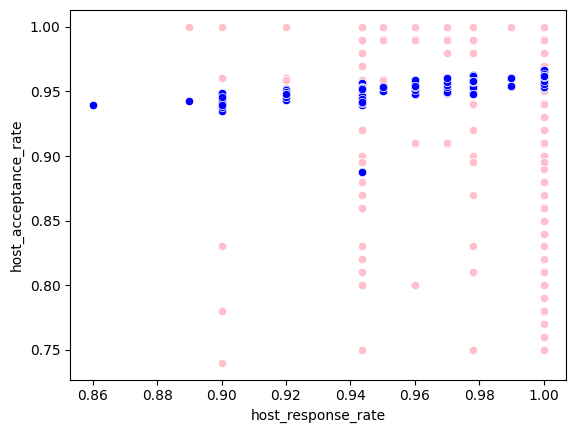

In [19]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='host_response_rate', y='Predicciones', color="blue", data=private_room)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

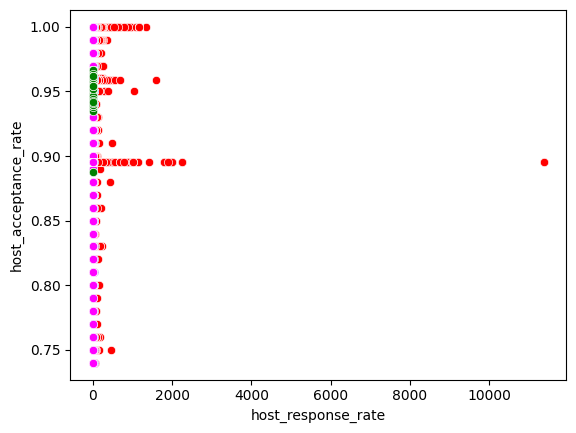

In [20]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=private_room)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=private_room)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="magenta", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=private_room)

In [21]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.012727947067677214
Coeficiente de correlación:  0.11281820361837541


## **2.“Price” vs availability_365, host_response_rate, number_of_reviews, accommodates“**

<Axes: xlabel='availability_365', ylabel='price'>

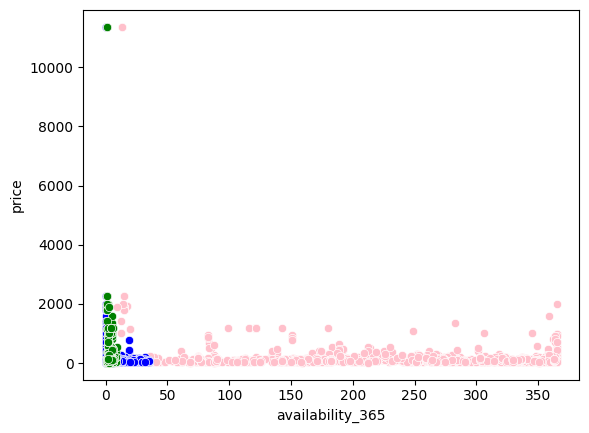

In [22]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='availability_365', y='price', color="pink", data=private_room)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=private_room)
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=private_room)
sns.scatterplot(x='accommodates', y='price', color="green", data=private_room)

In [23]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]]
Var_Dep= private_room['price']

In [24]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [25]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [26]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [27]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([-4.21350048e-01, -1.77866997e+03, -7.42219408e+00, -7.77181550e+00]),
 'rank_': 4,
 'singular_': array([4.20879215e+03, 2.72482784e+02, 4.09926140e+01, 9.60459195e-01]),
 'intercept_': 2063.5224657697313}

**Modelo matemático: y= -4.21350048e-01x1 + -1.77866997e+03x2 + -7.42219408e+00x3 + -7.77181550e+00x4 + 2063.5224657697313**

In [28]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.03747479663139719

In [29]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]])
y_pred

array([101.32014022, 105.95499075,  98.01431016, ..., 358.02657268,
       222.39781957, 116.35880132])

In [30]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones2', y_pred)
private_room.head()

,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,101.320140,0.963463,0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
1,105.954991,0.963227,1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,...,4.85,4.85,4.91,4.69,4.80,1.0,0.0,0.0,0.0,0.51
3,98.014310,0.963371,3,https://www.airbnb.com/rooms/751638,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,...,4.50,4.86,5.00,4.63,4.50,6.0,1.0,0.0,0.0,0.08
12,83.241651,0.960209,12,https://www.airbnb.com/rooms/755927,31/03/2023,city scrape,Room Oliva - Casa Pati de lÂ´Albera,"<b>The space</b><br />Wide double room, ground...","Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/9eeac113-fa97...,...,4.50,5.00,5.00,4.70,4.90,6.0,1.0,0.0,0.0,0.09
13,75.819457,0.960992,13,https://www.airbnb.com/rooms/756145,31/03/2023,city scrape,Room Abeto - Casa Pati de lÂ´Albera,Inside the rural house El Pati de l'Albera is ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276036/162f...,...,4.55,4.82,4.82,4.36,4.45,6.0,1.0,0.0,0.0,0.09


<Axes: xlabel='availability_365', ylabel='price'>

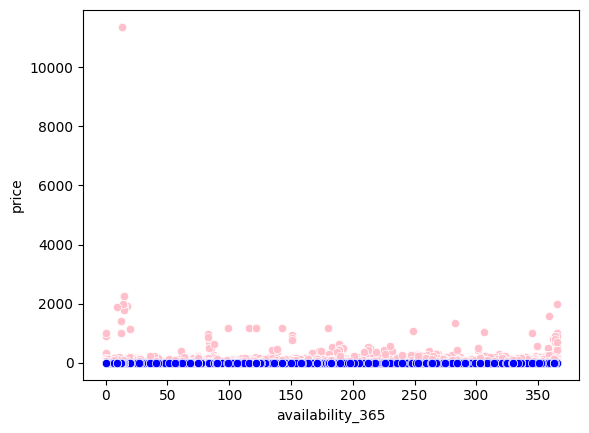

In [31]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='availability_365', y='price', color="pink", data=private_room)
sns.scatterplot(x='availability_365', y='Predicciones', color="blue", data=private_room)

<Axes: xlabel='availability_365', ylabel='price'>

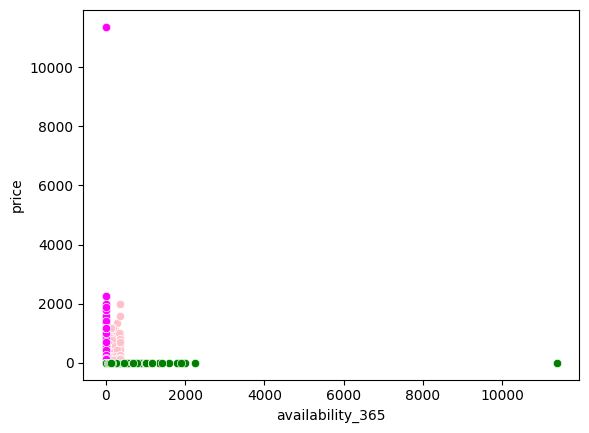

In [32]:
sns.scatterplot(x='availability_365', y='price', color="pink", data=private_room)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=private_room)
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=private_room)
sns.scatterplot(x='accommodates', y='price', color="magenta", data=private_room)
sns.scatterplot(x='price', y='Predicciones', color="green", data=private_room)

In [33]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.03747479663139719
Coeficiente de correlación:  0.19358408155475282


## **3. “host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication ”**

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

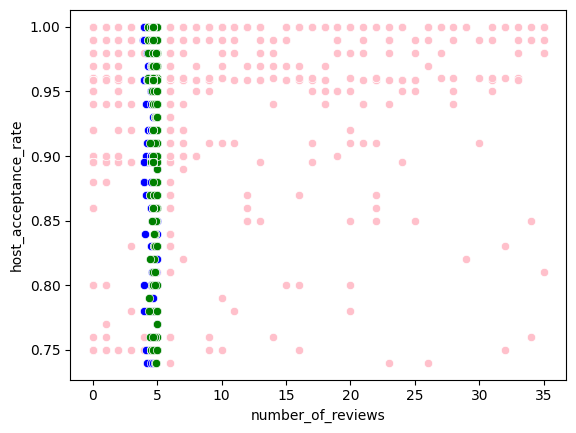

In [34]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="blue", data=private_room)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="green", data=private_room)

In [35]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= private_room['host_acceptance_rate']

In [36]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [37]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [38]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [39]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.00020093,  0.01430761,  0.02007074]),
 'rank_': 3,
 'singular_': array([272.48602438,   8.60916443,   4.06458834]),
 'intercept_': 0.7947835749505712}

**Modelo matemático: y= -0.00020093x1 + 0.01430761x2 + 0.02007074x3 + 0.7947835749505712**

In [40]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.008732352158406287

In [41]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']])
y_pred

array([0.9628049 , 0.96151722, 0.95771313, ..., 0.95444795, 0.95444795,
       0.95444795])

In [42]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones3', y_pred)
private_room.head()

,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.962805,101.320140,0.963463,0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
1,0.961517,105.954991,0.963227,1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,...,4.85,4.85,4.91,4.69,4.80,1.0,0.0,0.0,0.0,0.51
3,0.957713,98.014310,0.963371,3,https://www.airbnb.com/rooms/751638,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",...,4.50,4.86,5.00,4.63,4.50,6.0,1.0,0.0,0.0,0.08
12,0.957512,83.241651,0.960209,12,https://www.airbnb.com/rooms/755927,31/03/2023,city scrape,Room Oliva - Casa Pati de lÂ´Albera,"<b>The space</b><br />Wide double room, ground...","Sant Climent is a tiny village, with a populat...",...,4.50,5.00,5.00,4.70,4.90,6.0,1.0,0.0,0.0,0.09
13,0.954414,75.819457,0.960992,13,https://www.airbnb.com/rooms/756145,31/03/2023,city scrape,Room Abeto - Casa Pati de lÂ´Albera,Inside the rural house El Pati de l'Albera is ...,"Sant Climent is a tiny village, with a populat...",...,4.55,4.82,4.82,4.36,4.45,6.0,1.0,0.0,0.0,0.09


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

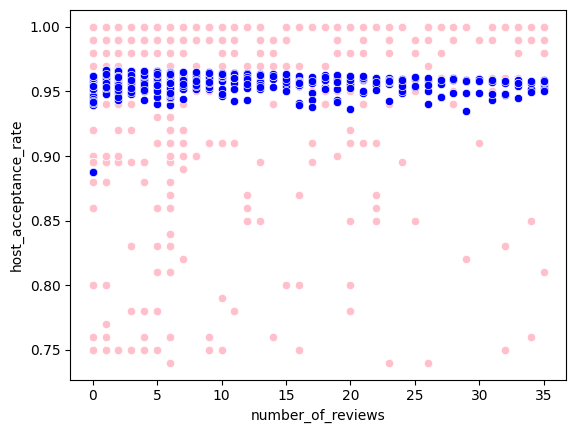

In [43]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="blue", data=private_room)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

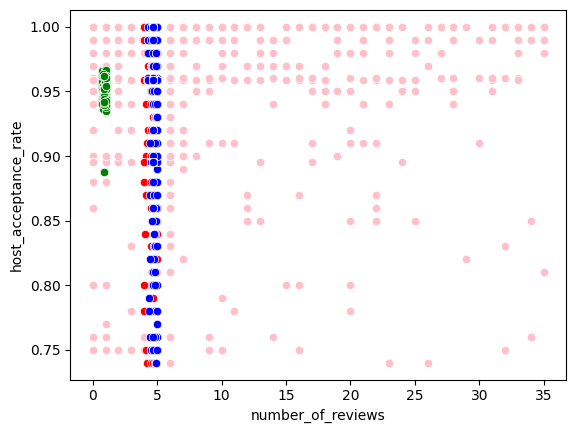

In [44]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=private_room)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="blue", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=private_room)

In [45]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.008732352158406287
Coeficiente de correlación:  0.09344705537579173


# **Tipo de habitación 2: Entire home/apt.**

In [46]:
df= pd.read_csv("Datos_limpios_ESP.csv")
df.head()

<ipython-input-46-0983eb0271d3>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("Datos_limpios_ESP.csv")


,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,Mun,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
1,1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,https://www.airbnb.com/users/show/6586355,Montse,...,4.85,4.85,4.91,4.69,4.80,1.0,0.0,0.0,0.0,0.51
2,2,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,sin informacion,https://a0.muscache.com/pictures/18245529/0886...,https://www.airbnb.com/users/show/6620645,Myriam,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
3,3,https://www.airbnb.com/rooms/751638,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,https://www.airbnb.com/users/show/3680160,Roberto,...,4.50,4.86,5.00,4.63,4.50,6.0,1.0,0.0,0.0,0.08
4,4,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,https://www.airbnb.com/users/show/180072,Marisa,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09


In [47]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

72

In [48]:
#No se porque sale que hay nulos si en el archivo del pais dice que hay 0 nulos
#para que no haya errores todos los nulos los reemplazo con bfill
df.fillna(method='bfill', inplace=True)

In [49]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

# **1.host_acceptance_rate vs host_response_rate**

In [50]:
enthome_apt = df[df['room_type'] == 'Entire home/apt']

In [ ]:
#Cambiar datos
enthome_apt['host_response_rate'] = enthome_apt['host_response_rate'].astype(str)  
enthome_apt['host_response_rate'] = enthome_apt['host_response_rate'].str.replace('%', '')  
enthome_apt['host_response_rate'] = pd.to_numeric(enthome_apt['host_response_rate'], errors='coerce')
enthome_apt[['host_acceptance_rate',"host_response_rate"]] = enthome_apt[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

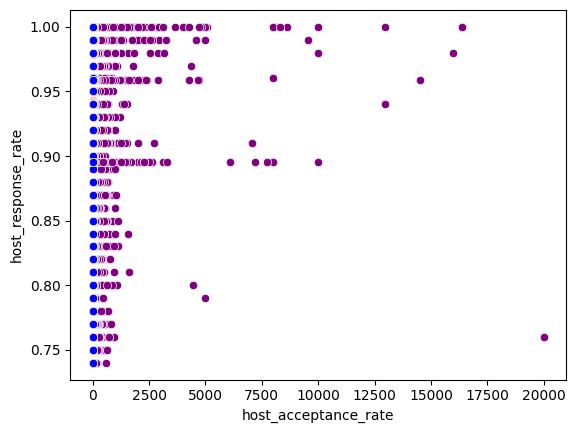

In [52]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate',color="pink",data=enthome_apt)
sns.scatterplot(x='price', y='host_acceptance_rate', color="purple", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="green", data=enthome_apt)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="blue", data=enthome_apt)

In [53]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]]
Var_Dep= enthome_apt['host_acceptance_rate']

In [54]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [55]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [56]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [57]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 1.00594754e-01, -2.56663782e-06, -2.82555041e-04, -1.35914211e-03]),
 'rank_': 4,
 'singular_': array([7.35249856e+04, 1.02241676e+03, 2.80566133e+01, 4.29712714e+00]),
 'intercept_': 0.8690804669920348}

**Modelo matemático: y= 1.00594754e-01x1 + -2.56663782e-06x2 + -2.82555041e-04x3 + -1.35914211e-03x4 + 0.8690804669920348**

In [58]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0047329115770817776

In [59]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]])
y_pred

array([0.96172819, 0.95466171, 0.95483725, ..., 0.9611029 , 0.95616655,
       0.96108493])

In [60]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones', y_pred)
enthome_apt.head()

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,0.961728,2,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,sin informacion,https://a0.muscache.com/pictures/18245529/0886...,https://www.airbnb.com/users/show/6620645,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
4,0.954662,4,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,https://www.airbnb.com/users/show/180072,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09
5,0.954837,5,https://www.airbnb.com/rooms/751997,01/04/2023,city scrape,CAN FELIP - Ãtico loft del s.XVIII,"MagnÃ­fica casa de pueblo del siglo XVIII, ubi...",Palafrugell se remonta al siglo X. El nÃºcleo ...,https://a0.muscache.com/pictures/f50b37b3-1c4d...,https://www.airbnb.com/users/show/3387407,...,4.69,4.69,4.45,4.79,4.59,12.0,12.0,0.0,0.0,0.34
6,0.959229,6,https://www.airbnb.com/rooms/752035,31/03/2023,city scrape,CAN TARONGETA - Soleado Apto. 1-1,MagnÃ­fico Apartamento de 62mÂ² con 2 dormitor...,Palafrugell se remonta al siglo X. El nÃºcleo ...,https://a0.muscache.com/pictures/303024e1-2deb...,https://www.airbnb.com/users/show/3387407,...,4.79,4.43,4.50,4.50,4.36,12.0,12.0,0.0,0.0,0.13
7,0.955438,7,https://www.airbnb.com/rooms/1215790,01/04/2023,city scrape,"100m FROM THE BEACH, with TERRACE","Big apartment with terrace (7 people), next to...",sin informacion,https://a0.muscache.com/pictures/ea54a005-62f2...,https://www.airbnb.com/users/show/3149645,...,4.78,4.89,5.00,4.56,4.11,1.0,1.0,0.0,0.0,0.08


<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

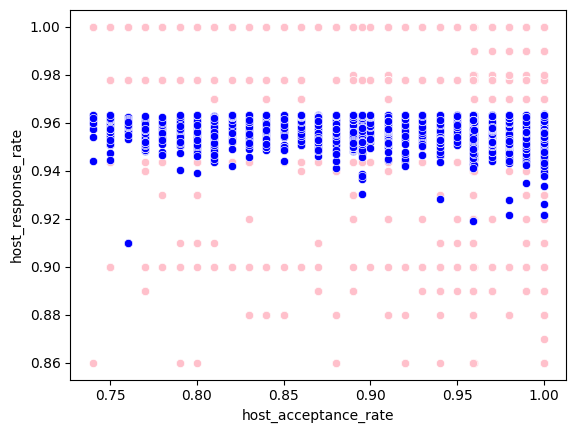

In [61]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="blue", data=enthome_apt)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

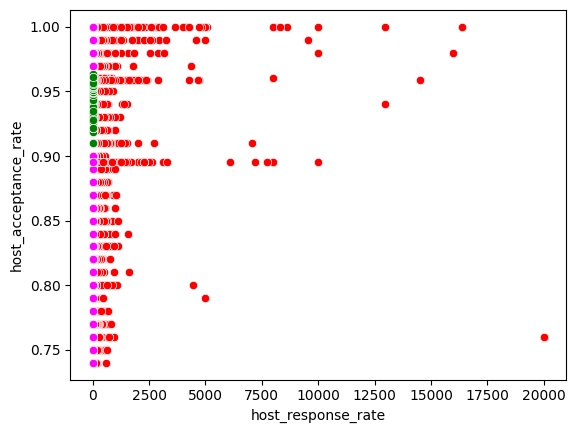

In [62]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=enthome_apt)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="magenta", data=enthome_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=enthome_apt)

In [63]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.0047329115770817776
Coeficiente de correlación:  0.06879615960997952


## **2.“Price” vs availability_365, host_response_rate, number_of_reviews, accommodates“**

<Axes: xlabel='availability_365', ylabel='price'>

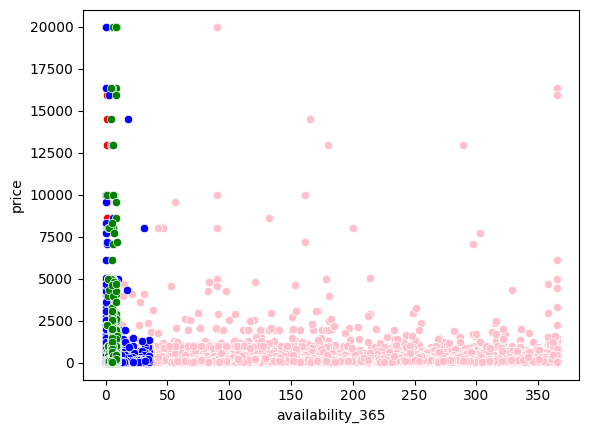

In [64]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='availability_365', y='price', color="pink", data=enthome_apt)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=enthome_apt)
sns.scatterplot(x='accommodates', y='price', color="green", data=enthome_apt)

In [65]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]]
Var_Dep= enthome_apt['price']

In [66]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [67]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [68]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [69]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([-1.79667652e-01, -6.63313247e+02, -3.75803036e+00,  3.71130948e+01]),
 'rank_': 4,
 'singular_': array([1.51355091e+04, 1.02341441e+03, 2.16724884e+02, 4.28357825e+00]),
 'intercept_': 740.6937043847571}

**Modelo matemático: y= -1.79667652e-01x1 + -6.63313247e+02x2 + -3.75803036e+00x3 + 3.71130948e+01x4 + 740.6937043847571**

In [70]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.01997462095358782

In [71]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]])
y_pred

array([146.6893441 , 221.89219945,  66.90234896, ..., 192.09512968,
       223.21549492, 261.00939886])

In [72]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones2', y_pred)
enthome_apt.head()

,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,146.689344,0.961728,2,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,sin informacion,https://a0.muscache.com/pictures/18245529/0886...,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
4,221.892199,0.954662,4,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09
5,66.902349,0.954837,5,https://www.airbnb.com/rooms/751997,01/04/2023,city scrape,CAN FELIP - Ãtico loft del s.XVIII,"MagnÃ­fica casa de pueblo del siglo XVIII, ubi...",Palafrugell se remonta al siglo X. El nÃºcleo ...,https://a0.muscache.com/pictures/f50b37b3-1c4d...,...,4.69,4.69,4.45,4.79,4.59,12.0,12.0,0.0,0.0,0.34
6,109.094050,0.959229,6,https://www.airbnb.com/rooms/752035,31/03/2023,city scrape,CAN TARONGETA - Soleado Apto. 1-1,MagnÃ­fico Apartamento de 62mÂ² con 2 dormitor...,Palafrugell se remonta al siglo X. El nÃºcleo ...,https://a0.muscache.com/pictures/303024e1-2deb...,...,4.79,4.43,4.50,4.50,4.36,12.0,12.0,0.0,0.0,0.13
7,326.928126,0.955438,7,https://www.airbnb.com/rooms/1215790,01/04/2023,city scrape,"100m FROM THE BEACH, with TERRACE","Big apartment with terrace (7 people), next to...",sin informacion,https://a0.muscache.com/pictures/ea54a005-62f2...,...,4.78,4.89,5.00,4.56,4.11,1.0,1.0,0.0,0.0,0.08


<Axes: xlabel='availability_365', ylabel='price'>

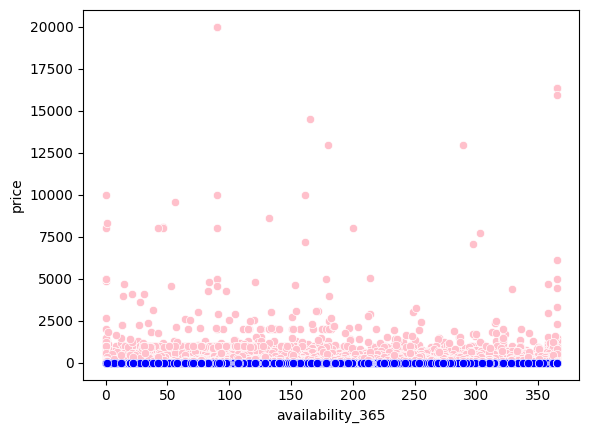

In [73]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='availability_365', y='price', color="pink", data=enthome_apt)
sns.scatterplot(x='availability_365', y='Predicciones', color="blue", data=enthome_apt)

<Axes: xlabel='availability_365', ylabel='price'>

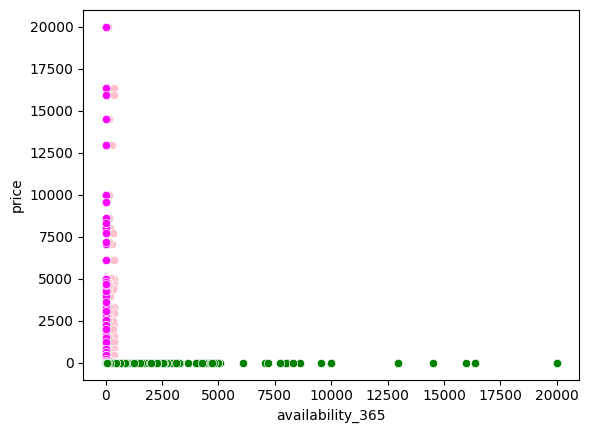

In [74]:
sns.scatterplot(x='availability_365', y='price', color="pink", data=enthome_apt)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=enthome_apt)
sns.scatterplot(x='accommodates', y='price', color="magenta", data=enthome_apt)
sns.scatterplot(x='price', y='Predicciones', color="green", data=enthome_apt)

In [75]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.01997462095358782
Coeficiente de correlación:  0.14133159927485367


## **3. “host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication ”**

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

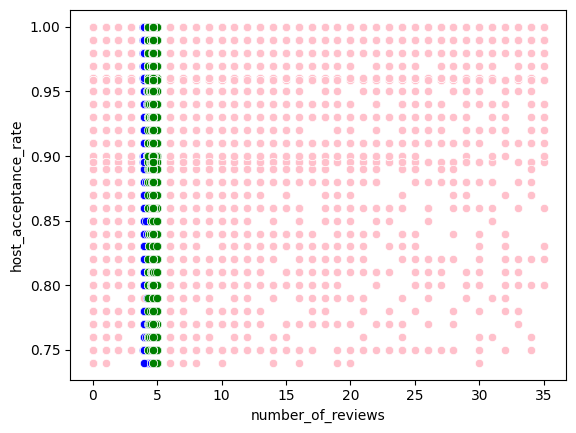

In [76]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="blue", data=enthome_apt)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="green", data=enthome_apt)

In [77]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= enthome_apt['host_acceptance_rate']

In [78]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [79]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [80]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [81]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.0002184 ,  0.00361165, -0.00360446]),
 'rank_': 3,
 'singular_': array([1024.55518365,   37.04391307,   19.04690225]),
 'intercept_': 0.9606962466842796}

**Modelo matemático: y= -0.0002184x1 + 0.00361165x2 + -0.00360446x3 + 0.9606962466842796**

In [82]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0010634399357239976

In [83]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']])
y_pred

array([0.95779483, 0.95865292, 0.95526147, ..., 0.96012981, 0.96012981,
       0.96012981])

In [84]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones3', y_pred)
enthome_apt.head()

,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,0.957795,146.689344,0.961728,2,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,sin informacion,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
4,0.958653,221.892199,0.954662,4,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09
5,0.955261,66.902349,0.954837,5,https://www.airbnb.com/rooms/751997,01/04/2023,city scrape,CAN FELIP - Ãtico loft del s.XVIII,"MagnÃ­fica casa de pueblo del siglo XVIII, ubi...",Palafrugell se remonta al siglo X. El nÃºcleo ...,...,4.69,4.69,4.45,4.79,4.59,12.0,12.0,0.0,0.0,0.34
6,0.958500,109.094050,0.959229,6,https://www.airbnb.com/rooms/752035,31/03/2023,city scrape,CAN TARONGETA - Soleado Apto. 1-1,MagnÃ­fico Apartamento de 62mÂ² con 2 dormitor...,Palafrugell se remonta al siglo X. El nÃºcleo ...,...,4.79,4.43,4.50,4.50,4.36,12.0,12.0,0.0,0.0,0.13
7,0.957754,326.928126,0.955438,7,https://www.airbnb.com/rooms/1215790,01/04/2023,city scrape,"100m FROM THE BEACH, with TERRACE","Big apartment with terrace (7 people), next to...",sin informacion,...,4.78,4.89,5.00,4.56,4.11,1.0,1.0,0.0,0.0,0.08


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

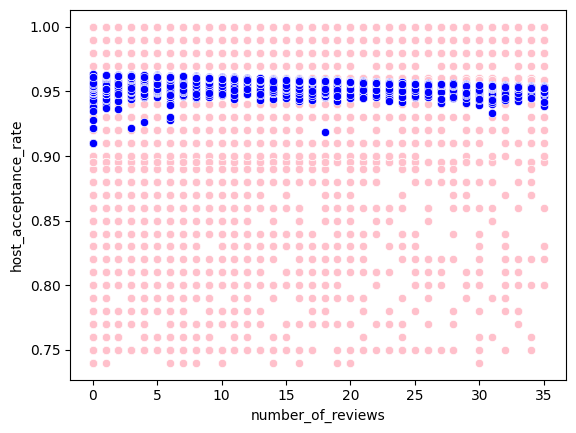

In [85]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="blue", data=enthome_apt)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

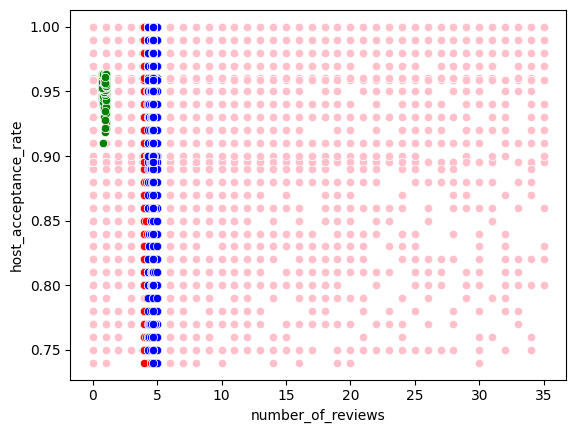

In [86]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=enthome_apt)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="blue", data=enthome_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=enthome_apt)

In [87]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.0010634399357239976
Coeficiente de correlación:  0.032610426794569825
